# Objetivos deste trabalho:
- Se familiarizar com o ambiente Notebook e com Python
- Implementar um perceptron simples, treiná-lo no conjunto de TREINO do CIFAR-10 e avaliá-lo no conjunto de TESTE (alvo: distinguir fotos de animais de meios de transporte)
- Utilizar a função sigmóide e verificar seu efeito no treinamento e na avaliação
- Modificar a metodologia para classificar cada classe individualmente (i.e. treinar 10 perceptrons, um para cada classe). Considerar: dado um exemplo, que passará por cada perceptron, como decidir qual é a classe dele?

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torchvision
import numpy as np

np.seterr(all='raise')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [0]:
# Carregar os datasets

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True)

0it [00:00, ?it/s]

100%|█████████▉| 170090496/170498071 [00:45<00:00, 4702652.87it/s]

Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
print(len(dataset_train), len(dataset_test))

50000 10000


In [0]:
# Converter para tons de cinza

# Treino
grayscale_dataset_train = []
for img,label in dataset_train:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_train.append([gray_npimg, category])
    
# Teste
grayscale_dataset_test = []
for img,label in dataset_test:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_test.append([gray_npimg, category])    

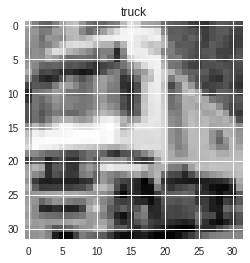

In [0]:
# Mostrar uma imagem

import matplotlib.pyplot as plt
import numpy as np

image_index = 1
label = grayscale_dataset_train[image_index][1]
npimg = grayscale_dataset_train[image_index][0]

plt.imshow(npimg, cmap='gray')
plt.title(label)
plt.show()

In [0]:
# Converter para vetores 1D

# Para pensar: por que a divisão por 255 no código abaixo?

linear_dataset_train = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train.append((linear_img,label))
    
linear_dataset_test = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test.append((linear_img,label))    

In [0]:
size = len(linear_dataset_train[0][0])
print(size)

1024


# Definindo o perceptron

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def perceptron(inputs, weights):
    x = np.dot(inputs,weights)
    if np.isnan(x):
        raise ValueError('gradiente explodiu ;[')
    return x
    

# Treinando o perceptron

In [0]:
def evaluate(weights, dataset):
    total_loss = 0
    acc = 0
    true_p = 0
    false_p = 0
    true_n = 0
    false_n = 0
    for img, label in dataset:
        img = np.append(img, 1)
        output = perceptron(img, weights)
        output = sigmoid(output)
        total_loss += abs(output - label)
        output = np.rint(output)
        if output == label:
            acc +=1
            if output == 1:
                true_p += 1
            else:
                true_n += 1
        elif output == 1:
            false_p += 1
        else:
            false_n += 1
    return acc, true_p, true_n, false_p, false_n, total_loss

In [0]:
linear_dataset_train = np.array(linear_dataset_train)

In [0]:
# Inicialização
weights = (np.random.rand(1, size) - 0.5)[0]
bias = (np.random.rand(1) - 0.5) 
weights = np.append(weights, bias) 

neta = 0.005
epochs = 120
np.random.shuffle(linear_dataset_train)

# Implemente o treino aqui (para separar as duas classes definidas)
accuracies = []
losses = []
for epoch in range(epochs):
    total_loss = 0
    acc = 0
    for img, label in linear_dataset_train:
        img = np.append(img, 1)
        output = perceptron(img, weights)
        output = sigmoid(output)
        if (np.rint(output) == label):
            acc += 1
        loss = label - output
        total_loss += abs(loss)
        nudge = neta * loss * output * (1 - output) * img
        weights += nudge
        
    acc = acc / (len(linear_dataset_train))
    accuracies.append(acc)
    losses.append(total_loss)
    if (epoch) % 5 == 0:
        print(f'Total Loss at epoch {epoch + 1} is {total_loss}, Accuracy: {acc}')

Total Loss at epoch 1 is 17851.32155800503, Accuracy: 0.68664


170500096it [01:00, 4702652.87it/s]                               

Total Loss at epoch 6 is 17830.489140019377, Accuracy: 0.71622
Total Loss at epoch 11 is 17716.7916206652, Accuracy: 0.72038
Total Loss at epoch 16 is 17690.970780395688, Accuracy: 0.72336
Total Loss at epoch 21 is 17685.815884447675, Accuracy: 0.72456
Total Loss at epoch 26 is 17682.584684753572, Accuracy: 0.72578
Total Loss at epoch 31 is 17678.18470481181, Accuracy: 0.7262
Total Loss at epoch 36 is 17672.765323477157, Accuracy: 0.72692
Total Loss at epoch 41 is 17666.82791812046, Accuracy: 0.72706
Total Loss at epoch 46 is 17660.72717549709, Accuracy: 0.72726
Total Loss at epoch 51 is 17654.663311706187, Accuracy: 0.72762
Total Loss at epoch 56 is 17648.738180387005, Accuracy: 0.7277
Total Loss at epoch 61 is 17642.998607390728, Accuracy: 0.72784
Total Loss at epoch 66 is 17637.462269949665, Accuracy: 0.72808
Total Loss at epoch 71 is 17632.13195238253, Accuracy: 0.7283
Total Loss at epoch 76 is 17627.003140117275, Accuracy: 0.72842
Total Loss at epoch 81 is 17622.06798951082, Accur

In [0]:
# Avalie o modelo treinado aqui
# Como a acurácia no conjunto de teste se compara com a acurácia obtida no conjunto de treino?
acc, true_p, true_n, false_p, false_n, loss = evaluate(weights, linear_dataset_test)
total = len(linear_dataset_test)
print(f'--------Test stats--------')
print(f'Accuracy: {acc/total * 100}% \n Correct: {acc} Total: {total} \n')
print(f'True Positive: {true_p}, True Negative: {true_n} \n False Positive: {false_p}, False Negative: {false_n}')
print(f'Total Loss: {loss}')

--------Test stats--------
Accuracy: 66.42% 
 Correct: 6642 Total: 10000 

True Positive: 3053, True Negative: 3589 
 False Positive: 2411, False Negative: 947
Total Loss: 3929.9217035586976


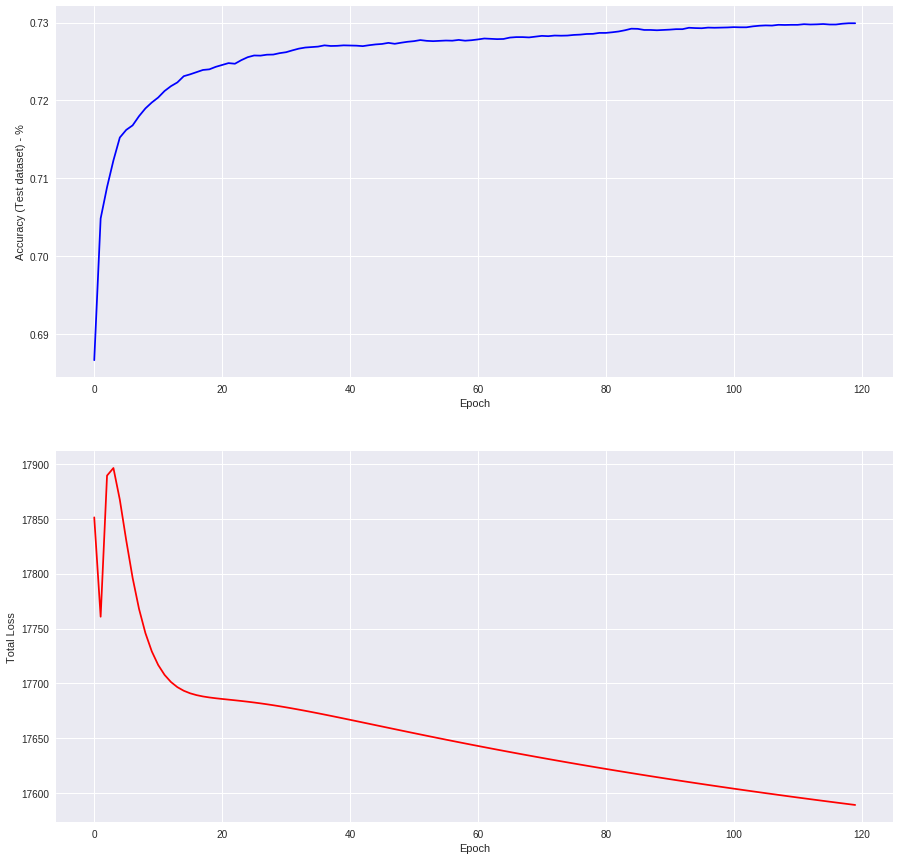

In [0]:
# Caso queiram plotar alguma coisa

accuracies = np.array(accuracies)
plt.figure(figsize=(15,15))

plt.subplot(2, 1, 1)
plt.plot(accuracies, 'b')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (Test dataset) - %')

plt.subplot(2, 1, 2)
plt.plot(losses, 'r')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.show()

# Classificando classes individuais

Implemente aqui a modificação do processo de avaliação e treinamento para poder classificar cada classe individualmente.

- Ideia geral: treinar um perceptron por classe (exemplo positivo = exemplos da classe; exemplos negativos = exemplo de todas outras classes)
- Dado um exemplo qualquer, como decidir qual perceptron está dando a classe correta?

In [0]:
# Funcao para retornar dataset com todos exemplos do label target e o mesmo numero de exemplos negativos
def balance_dataset(dataset, target_label):
    new_dataset = []
    target_count = 0
    for img, label in dataset:
        label = label
        if label == target_label:
            new_dataset.append([img, 1])
            target_count += 1
    target_count = (int) (target_count // 9)
    for i in range(10):
        negative_count = 0
        if i == target_label:
            continue
        for img, label in dataset:
            label = label
            if i == label:
                new_dataset.append([img, 0]) 
                negative_count += 1
                if negative_count == target_count:
                    break
    new_dataset = np.array(new_dataset)
    np.random.shuffle(new_dataset)
    return new_dataset

def adjust_test_dataset_labels(dataset, target_label):
    new_dataset = []
    for img, label in dataset:
        if label == target_label:
            new_dataset.append([img, 1])
        else:
            new_dataset.append([img, 0])
    return np.array(new_dataset)

In [0]:
train_dataset = []
for img, label in dataset_train:
    img = np.array(img.convert('L'))
    img = img.reshape(-1) / 255
    train_dataset.append([img, label])
train_dataset = np.array(train_dataset)

test_dataset = []
for img, label in dataset_test:
    img = np.array(img.convert('L'))
    img = img.reshape(-1) / 255
    test_dataset.append([img, label])
test_dataset = np.array(test_dataset)

In [0]:
perceptron_weights = np.random.ranf((len(classes), 1025)) - 0.5
neta = 0.01
epochs = 100
accuracies = []
losses = []

for target_label in range(perceptron_weights.shape[0]):
    balanced_train_dataset = adjust_test_dataset_labels(train_dataset, target_label)
    #balanced_train_dataset = balance_dataset(train_dataset, target_label) 
    current_weight = perceptron_weights[target_label]
    current_acc = []
    current_loss = []
    print(f'\n\n Training perceptron {target_label}, Class: {classes[target_label]} \n\n')
    for epoch in range(epochs):
        train_acc = 0
        total_loss = 0
        for img, label in balanced_train_dataset:
            img = np.append(img, 1)
            output = perceptron(img, current_weight)
            output = sigmoid(output)
            loss = label - output
            total_loss += abs(loss)
            nudge = neta * img * loss * (1 - output) * output
            if label == 1:
                nudge *= 10
            current_weight += nudge
            
            #Check for hit or miss            
            if np.rint(output) == label:
                train_acc +=1
        if (epoch) % 5 == 0:
            print(f'Total Loss at epoch {epoch + 1} is {int(total_loss)}', end=' || ')
            print(f'Train Accuracy: {train_acc / len(balanced_train_dataset)}')
        current_acc.append(train_acc / len(balanced_train_dataset))
        current_loss.append(total_loss)
    accuracy, tp, tn, fp, fn, loss = evaluate(current_weight, adjust_test_dataset_labels(test_dataset, target_label))
    acc = accuracy / (fp + fn + tp + tn)
    print(f'\n-----------Final test stats-----------')
    print(f'Accuracy: {acc}\n Absolute Accuracy: {accuracy} \nTrue Positive: {tp}, True Negative: {tn} \n False Positive: {fp}, False Negative: {fn}')
    perceptron_weights[target_label] = current_weight
    accuracies.append(current_acc)
    losses.append(current_loss)



 Training perceptron 0, Class: plane 


Total Loss at epoch 1 is 25765 || Train Accuracy: 0.48426
Total Loss at epoch 6 is 21686 || Train Accuracy: 0.57528
Total Loss at epoch 11 is 20907 || Train Accuracy: 0.59002
Total Loss at epoch 16 is 20361 || Train Accuracy: 0.60272
Total Loss at epoch 21 is 20305 || Train Accuracy: 0.6036
Total Loss at epoch 26 is 20126 || Train Accuracy: 0.6067
Total Loss at epoch 31 is 19806 || Train Accuracy: 0.61406
Total Loss at epoch 36 is 19786 || Train Accuracy: 0.61438
Total Loss at epoch 41 is 19643 || Train Accuracy: 0.61782
Total Loss at epoch 46 is 19275 || Train Accuracy: 0.6239
Total Loss at epoch 51 is 19271 || Train Accuracy: 0.6247
Total Loss at epoch 56 is 19715 || Train Accuracy: 0.61476
Total Loss at epoch 61 is 19490 || Train Accuracy: 0.62028
Total Loss at epoch 66 is 19279 || Train Accuracy: 0.6238
Total Loss at epoch 71 is 19048 || Train Accuracy: 0.6278
Total Loss at epoch 76 is 19039 || Train Accuracy: 0.62722
Total Loss at epoch 81

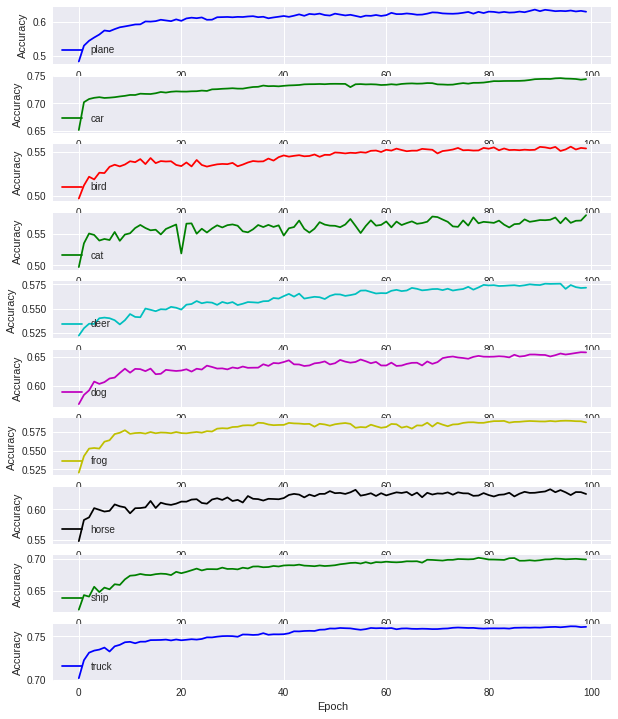

In [0]:
plt.figure(figsize=(10,25))
colours = ['b', 'g', 'r', 'g', 'c', 'm', 'y', 'k', 'g', 'b']
for i in range(10):
    plt.subplot(20, 1, i+1)
    plt.plot(accuracies[i], colours[i], label=classes[i])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower left')
    #plt.subplots_adjust(bottom=0.5)
plt.show()

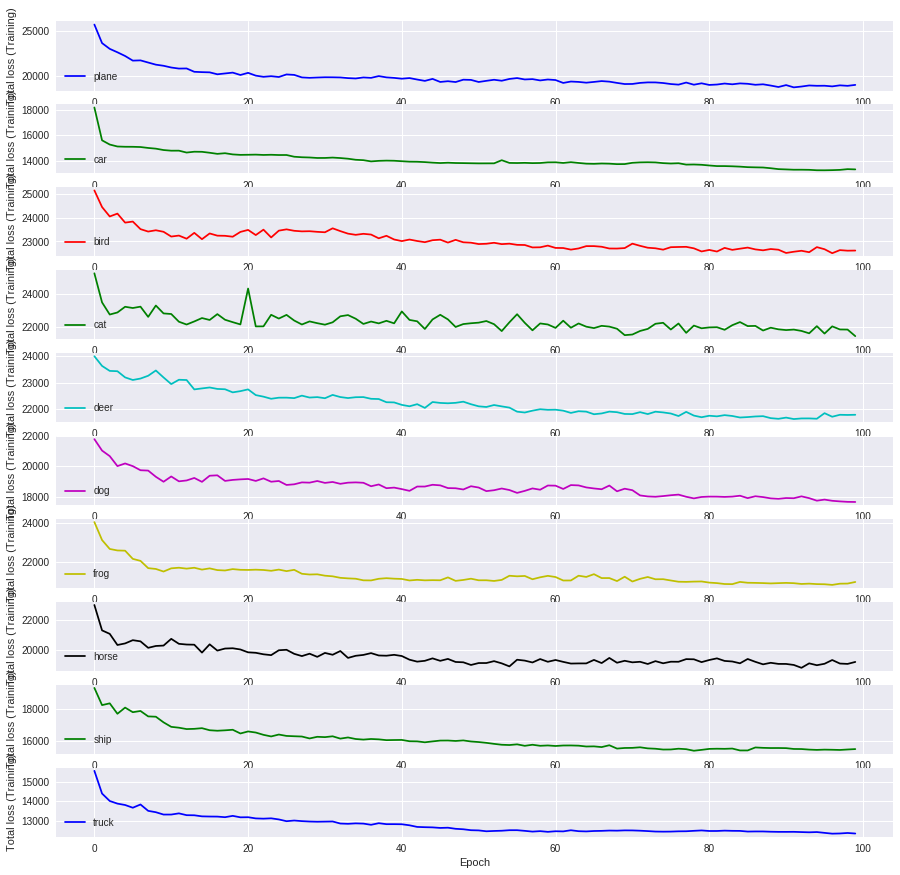

In [0]:
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(10, 1, i+1)
    plt.plot(losses[i], colours[i], label=classes[i])
    plt.xlabel('Epoch')
    plt.ylabel('Total loss (Training)')
    plt.legend(loc='lower left')
    
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix

def eval_network(weights, dataset):
    correct = 0
    y_true = []
    y_pred = []
    for img, label in dataset:
        y_true.append(label);
        img = np.append(img, 1)
        outputs = []
        for i in range(10):
            out = perceptron(img, weights[i])
            out = sigmoid(out)
            outputs.append(out)
        output = np.where(outputs == np.amax(outputs))
        y_pred.append(output);
        if output[0].item() == label:
            correct += 1
    y_true = np.array(y_true)
    y_pred = np.array(y_pred).squeeze()
    cm = confusion_matrix(y_true, y_pred);
    return correct / len(dataset), cm


In [0]:

total_acc, _ = eval_network(perceptron_weights, train_dataset)
print(f'Accuracy between all perceptrons on train dataset is {str(total_acc * 100)[:4]}%')

total_acc, cm = eval_network(perceptron_weights, test_dataset)
print(f'Accuracy between all perceptrons on test dataset is {str(total_acc * 100)[:4]}%')

(50000,) (50000,)
Accuracy between all perceptrons on train dataset is 26.6%
(10000,) (10000,)
Accuracy between all perceptrons on test dataset is 24.7%
[[203  92  13 134  58  25  36 250 129  60]
 [ 29 422   5  85  32  12  52 102  95 166]
 [124  83  16 225 107  37  95 248  39  26]
 [ 67 107  16 286 117  81  77 148  57  44]
 [ 70  75  21 223 156  60  93 227  48  27]
 [ 68  63  16 201 109 175  92 188  65  23]
 [ 62 162  12 258  66  64 166 124  38  48]
 [ 50  71  15 165 103  38  55 355  90  58]
 [ 88 159   8  91  19  36  20 121 345 113]
 [ 24 265   3  75  28  19  30  86 116 354]]


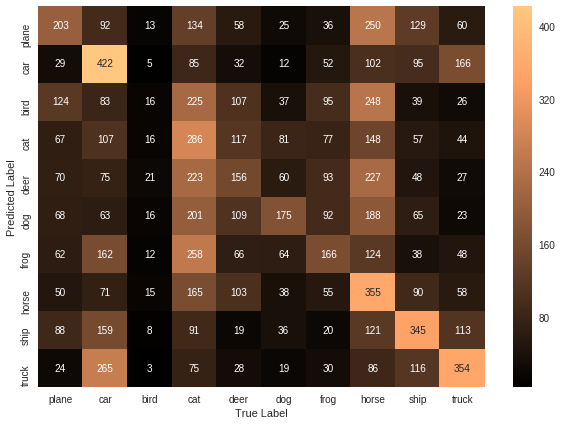

In [0]:
import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(cm, index=classes, columns=classes)
plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.copper, fmt='d')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()